In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#  read the Dataset
file_path = "/content/weather_2016_2020_daily.csv"
df = pd.read_csv(file_path, parse_dates=["Date"])
df.set_index("Date", inplace=True)

In [12]:
#  Dataset Info
print("First date:", df.index.min())
print("Last date:", df.index.max())
df.info()

First date: 2016-01-07 00:00:00
Last date: 2020-12-08 00:00:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1545 entries, 2016-08-06 to 2020-08-30
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temp_max         1545 non-null   int64  
 1   Temp_avg         1545 non-null   float64
 2   Temp_min         1545 non-null   int64  
 3   Hum_max          1545 non-null   int64  
 4   Hum_avg          1545 non-null   float64
 5   Hum_min          1545 non-null   int64  
 6   Wind_max         1545 non-null   int64  
 7   Wind_avg         1545 non-null   float64
 8   Wind_min         1545 non-null   int64  
 9   Press_max        1545 non-null   float64
 10  Press_avg        1545 non-null   float64
 11  Press_min        1545 non-null   float64
 12  Precipit         1545 non-null   float64
 13  Precipit_lag_1   1545 non-null   float64
 14  Precipit_lag_2   1545 non-null   float64
 15  Precipit_lag_3   1545 non

In [13]:
# Handle Missing Values
missing_ratio = df.isna().sum() / len(df)
print("Missing Values Ratio:\n", missing_ratio)

Missing Values Ratio:
 Temp_max           0.0
Temp_avg           0.0
Temp_min           0.0
Hum_max            0.0
Hum_avg            0.0
Hum_min            0.0
Wind_max           0.0
Wind_avg           0.0
Wind_min           0.0
Press_max          0.0
Press_avg          0.0
Press_min          0.0
Precipit           0.0
Precipit_lag_1     0.0
Precipit_lag_2     0.0
Precipit_lag_3     0.0
Precipit_lag_4     0.0
Precipit_lag_5     0.0
Precipit_lag_6     0.0
Precipit_lag_7     0.0
Precipit_3d_avg    0.0
Precipit_7d_avg    0.0
Precipit_7d_std    0.0
day_of_week        0.0
month              0.0
day_of_year        0.0
dtype: float64


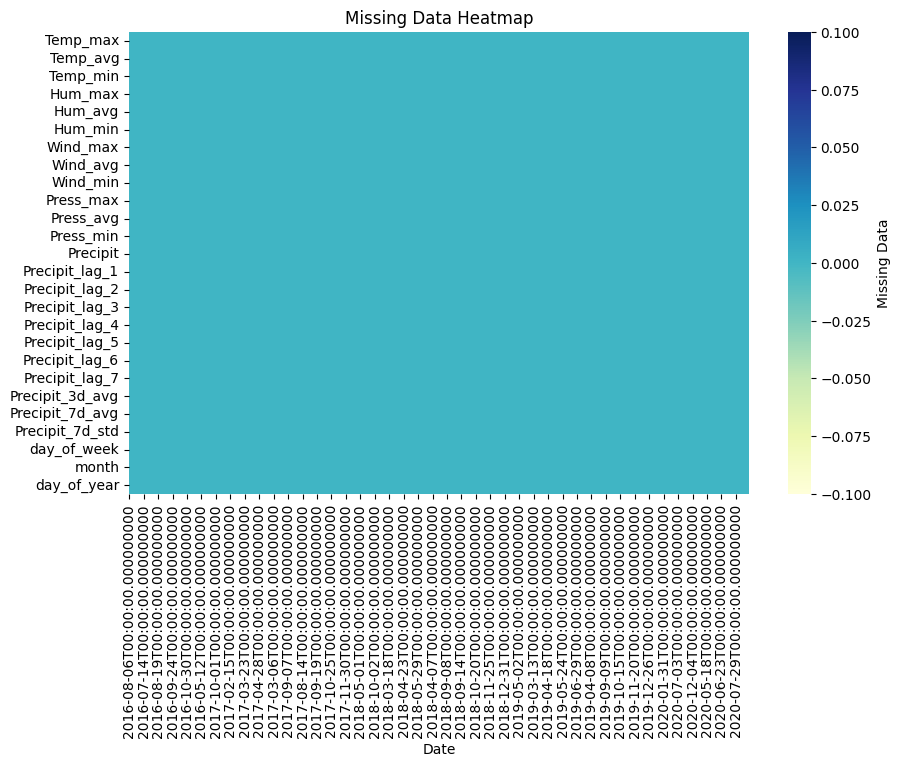

In [14]:
# Visualize missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.title("Missing Data Heatmap")
plt.show()

In [15]:
# Forward fill for any missing values
df.fillna(method='ffill', inplace=True)

In [4]:
# Feature Selection
selected_features = [
    'Temp_max', 'Temp_avg', 'Temp_min',
    'Hum_max', 'Hum_avg', 'Hum_min',
    'Wind_max', 'Wind_avg', 'Wind_min',
    'Press_max', 'Press_avg', 'Press_min',
    'Precipit'
]
df = df[selected_features]

In [5]:
# Lag Features (1–7 days)
for lag in range(1, 8):
    df[f'Precipit_lag_{lag}'] = df['Precipit'].shift(lag)

## Rolling Statistics
df['Precipit_3d_avg'] = df['Precipit'].rolling(window=3).mean()
df['Precipit_7d_avg'] = df['Precipit'].rolling(window=7).mean()
df['Precipit_7d_std'] = df['Precipit'].rolling(window=7).std()

## Time-based Features
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

In [6]:
# Remove rows with NaN caused by rolling and lagging
df.dropna(inplace=True)

In [7]:
#  Define Target and Features
X = df.drop(columns=['Precipit'])
y = df['Precipit']

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42
)

In [10]:
X_train, X_test, y_train, y_test

(            Temp_max  Temp_avg  Temp_min  Hum_max  Hum_avg  Hum_min  Wind_max  \
 Date                                                                            
 2016-08-06        88      79.3        71       96     73.3       46        12   
 2016-09-06        88      79.2        72      100     75.3       49        15   
 2016-10-06        90      80.6        72      100     80.0       55        14   
 2016-11-06        90      82.0        75       96     79.8       59        13   
 2016-12-06        86      78.7        73      100     88.0       72        13   
 ...              ...       ...       ...      ...      ...      ...       ...   
 2019-10-22        79      65.3        54       75     50.6       23        13   
 2019-10-23        80      66.1        53       86     63.2       38        22   
 2019-10-24        82      69.9        60       93     78.5       56        21   
 2019-10-25        67      56.6        51       93     84.5       74        20   
 2019-10-26     

In [11]:
# Save column order
X_train_columns = X_train.columns.tolist()

In [ ]:
# Save column order
X_train_columns = X_train.columns.tolist()

In [ ]:
# Feature Scaling
scaler_std = StandardScaler()
X_train_scaled = scaler_std.fit_transform(X_train)
X_test_scaled = scaler_std.transform(X_test)

In [ ]:
# Min-Max scalar
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)